In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("balraj98/berkeley-segmentation-dataset-500-bsds500")

print("Path to dataset files:", path)

100%|██████████| 56.0M/56.0M [00:00<00:00, 180MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/balraj98/berkeley-segmentation-dataset-500-bsds500/versions/1


Steps to Implement K-Means for Image Clustering
1. Load the Dataset
Since you've downloaded the dataset using kagglehub, locate the images and load them into Python.

2. Preprocess the Images
Convert images into numerical arrays.

Normalize pixel values.

Reshape the image for clustering.

3. Apply K-Means Clustering
Choose an appropriate K value.

Use K-Means algorithm to cluster similar colors in the image.

4. Reconstruct the Image
Replace each pixel with its cluster centroid value.

5. Evaluate Results
Experiment with different values of K.

Use Boundary Displacement Error (BDE) to compare segmentation results. **bold text**

In [ ]:
from google.colab import files

# Upload kaggle.json manually
files.upload()



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shivamsinghnit","key":"c9bea80d3cf93220c82fbf3679aece24"}'}

In [ ]:
import os

# Move kaggle.json to the right directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d balraj98/berkeley-segmentation-dataset-500-bsds500


Dataset URL: https://www.kaggle.com/datasets/balraj98/berkeley-segmentation-dataset-500-bsds500
License(s): other


In [ ]:
!unzip berkeley-segmentation-dataset-500-bsds500.zip -d dataset


Archive:  berkeley-segmentation-dataset-500-bsds500.zip
  inflating: dataset/ground_truth/test/100007.mat  
  inflating: dataset/ground_truth/test/100039.mat  
  inflating: dataset/ground_truth/test/100099.mat  
  inflating: dataset/ground_truth/test/10081.mat  
  inflating: dataset/ground_truth/test/101027.mat  
  inflating: dataset/ground_truth/test/101084.mat  
  inflating: dataset/ground_truth/test/102062.mat  
  inflating: dataset/ground_truth/test/103006.mat  
  inflating: dataset/ground_truth/test/103029.mat  
  inflating: dataset/ground_truth/test/103078.mat  
  inflating: dataset/ground_truth/test/104010.mat  
  inflating: dataset/ground_truth/test/104055.mat  
  inflating: dataset/ground_truth/test/105027.mat  
  inflating: dataset/ground_truth/test/106005.mat  
  inflating: dataset/ground_truth/test/106047.mat  
  inflating: dataset/ground_truth/test/107014.mat  
  inflating: dataset/ground_truth/test/107045.mat  
  inflating: dataset/ground_truth/test/107072.mat  
  inflati

In [ ]:
import os

dataset_path = "dataset/"
print("Dataset files:", os.listdir(dataset_path))


Dataset files: ['images', 'ground_truth']


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.metrics import adapted_rand_error

# Define dataset paths
dataset_paths = {
    "train": "/content/dataset/images/train",
    "test": "/content/dataset/images/test",
    "val": "/content/dataset/images/val"
}

# Function to load images from a folder
def load_images_from_folder(folder, num_images=5):
    images = []
    filenames = os.listdir(folder)[:num_images]  # Load only a few images for testing
    for file in filenames:
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            images.append(img)
    return images


In [ ]:
def apply_kmeans(image, k):
    h, w, c = image.shape
    pixels = image.reshape((-1, 3))
    pixels = np.float32(pixels)

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pixels)
    centers = kmeans.cluster_centers_

    # Reconstruct the image
    clustered_image = centers[labels].reshape((h, w, c))
    clustered_image = np.uint8(clustered_image)  # Convert back to uint8

    return clustered_image


In [ ]:
def visualize_kmeans(images, k_values):
    for img in images:
        fig, axs = plt.subplots(1, len(k_values) + 1, figsize=(15, 5))

        # Show original image
        axs[0].imshow(img)
        axs[0].set_title("Original")
        axs[0].axis("off")

        # Show K-Means segmented images
        for i, k in enumerate(k_values):
            clustered_img = apply_kmeans(img, k)
            axs[i+1].imshow(clustered_img)
            axs[i+1].set_title(f"K = {k}")
            axs[i+1].axis("off")

        plt.show()


In [ ]:
def calculate_bde(original, clustered):
    error, *_ = adapted_rand_error(original, clustered)
    return error

# Compare BDE for different K values
def evaluate_segmentation(images, k_values):
    for img in images:
        print("Evaluating Image...\n")
        for k in k_values:
            clustered_img = apply_kmeans(img, k)
            bde = calculate_bde(img, clustered_img)
            print(f"BDE for K={k}: {bde:.4f}")
        print("\n")


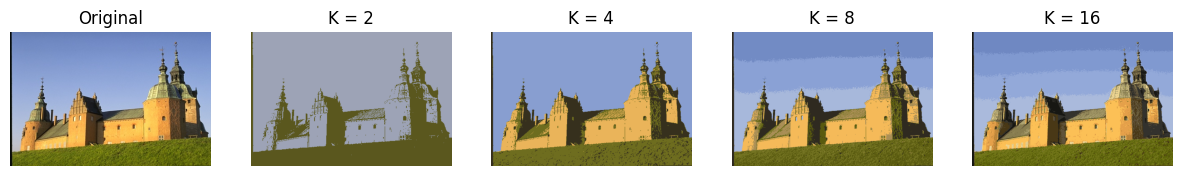

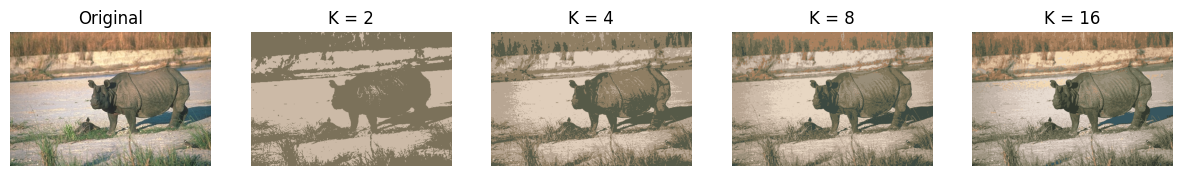

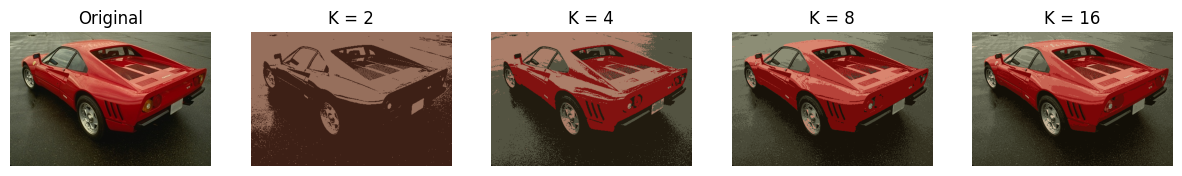

Evaluating Image...

BDE for K=2: 0.9731
BDE for K=4: 0.9624
BDE for K=8: 0.9260
BDE for K=16: 0.9016


Evaluating Image...

BDE for K=2: 0.9777
BDE for K=4: 0.9650
BDE for K=8: 0.9516
BDE for K=16: 0.9398


Evaluating Image...

BDE for K=2: 0.9714
BDE for K=4: 0.9597
BDE for K=8: 0.9318
BDE for K=16: 0.9110




In [ ]:
# Load images from test set (modify to load from train or val if needed)
images = load_images_from_folder(dataset_paths["test"], num_images=3)

# Define K values to test
k_values = [2, 4, 8, 16]

# Visualize K-Means clustering results
visualize_kmeans(images, k_values)

# Evaluate segmentation using BDE
evaluate_segmentation(images, k_values)


2️⃣ How Does the Choice of K Affect Segmentation Results?
The choice of K (number of clusters) directly impacts the quality of image segmentation:

✅ Small K (e.g., 2 or 3)

Results in coarse segmentation with large regions.

Good for binary segmentation (e.g., foreground vs. background).

Fails to capture fine details in complex images.

✅ Moderate K (e.g., 4 to 8)

Produces reasonable segmentation with more defined regions.

Captures major color variations while keeping computation efficient.

Commonly used for natural images and simple textures.

✅ Large K (e.g., 16 or more)

Leads to over-segmentation, breaking an image into tiny regions.

Useful for applications like texture analysis or superpixels.

Increases computational complexity and noise.

📌 Observations:
Choosing K too small → misses details.

Choosing K too large → introduces unnecessary complexity.

Optimal K depends on the image complexity and segmentation goal.

3️⃣ What Are the Limitations of Using K-Means for Image Segmentation?
Despite its simplicity, K-Means has several limitations in image segmentation:

1️⃣ Sensitivity to K Value
The best K value is not known beforehand.

Requires trial and error or techniques like Elbow Method to find an optimal K.

2️⃣ Ignores Spatial Relationships
K-Means treats pixels independently based on color/intensity.

It does not consider neighboring pixels, leading to noisy segmentation.

3️⃣ Struggles with Overlapping Colors
K-Means relies on color similarity for clustering.

It fails when different objects have similar colors (e.g., sky & water).

4️⃣ Sensitive to Initialization
K-Means can converge to local minima depending on initial cluster centers.

Different runs may produce different segmentations.

5️⃣ Computational Cost for Large Images
Large images require clustering millions of pixels.

K-Means can be slow for high-resolution images, especially for large K.

🛠️ Possible Improvements
🔹 Use Gaussian Mixture Models (GMM) for soft clustering.
🔹 Use Mean-Shift or Watershed Algorithm for better spatial consistency.
🔹 Apply Deep Learning (CNNs, U-Nets) for advanced segmentation.

Would you like a code example comparing K-Means with other segmentation techniques? 🚀 **bold text**

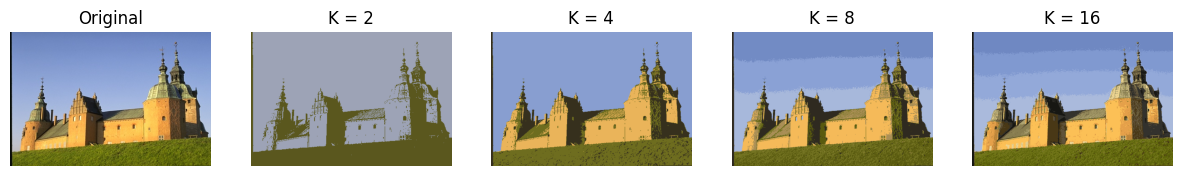

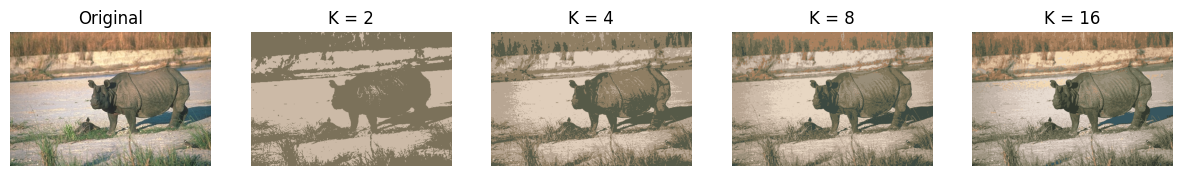

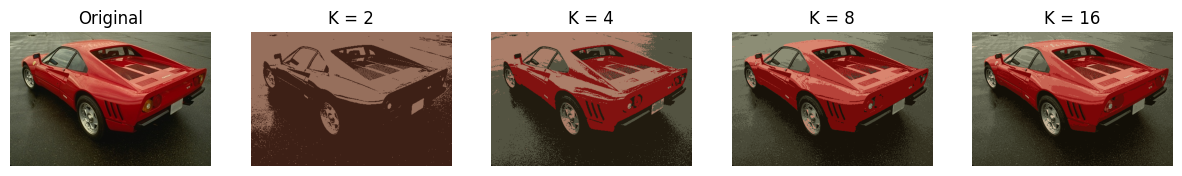

Evaluating Image...

BDE for K=2: 0.9731
BDE for K=4: 0.9624
BDE for K=8: 0.9260
BDE for K=16: 0.9016


Evaluating Image...

BDE for K=2: 0.9777
BDE for K=4: 0.9650
BDE for K=8: 0.9516
BDE for K=16: 0.9398


Evaluating Image...

BDE for K=2: 0.9714
BDE for K=4: 0.9597
BDE for K=8: 0.9318
BDE for K=16: 0.9110




In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.metrics import adapted_rand_error

# Define dataset paths
dataset_paths = {
    "train": "/content/dataset/images/train",
    "test": "/content/dataset/images/test",
    "val": "/content/dataset/images/val"
}

# Function to load images from a folder
def load_images_from_folder(folder, num_images=3):
    images = []
    filenames = os.listdir(folder)[:num_images]  # Load a few images for testing
    for file in filenames:
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            images.append(img)
    return images

# Function to apply K-Means clustering
def apply_kmeans(image, k):
    h, w, c = image.shape
    pixels = image.reshape((-1, 3))
    pixels = np.float32(pixels)

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pixels)
    centers = kmeans.cluster_centers_

    # Reconstruct the image
    clustered_image = centers[labels].reshape((h, w, c))
    clustered_image = np.uint8(clustered_image)  # Convert back to uint8

    return clustered_image

# Function to visualize K-Means clustering for different K values
def visualize_kmeans(images, k_values):
    for img in images:
        fig, axs = plt.subplots(1, len(k_values) + 1, figsize=(15, 5))

        # Show original image
        axs[0].imshow(img)
        axs[0].set_title("Original")
        axs[0].axis("off")

        # Show K-Means segmented images
        for i, k in enumerate(k_values):
            clustered_img = apply_kmeans(img, k)
            axs[i+1].imshow(clustered_img)
            axs[i+1].set_title(f"K = {k}")
            axs[i+1].axis("off")

        plt.show()

# Function to compute Boundary Displacement Error (BDE)
def calculate_bde(original, clustered):
    error, *_ = adapted_rand_error(original, clustered)
    return error

# Function to evaluate segmentation performance using BDE
def evaluate_segmentation(images, k_values):
    for img in images:
        print("Evaluating Image...\n")
        for k in k_values:
            clustered_img = apply_kmeans(img, k)
            bde = calculate_bde(img, clustered_img)
            print(f"BDE for K={k}: {bde:.4f}")
        print("\n")

# Load images from test set (modify to train or val if needed)
images = load_images_from_folder(dataset_paths["test"], num_images=3)

# Define K values to test
k_values = [2, 4, 8, 16]

# Visualize segmentation results
visualize_kmeans(images, k_values)

# Evaluate segmentation using BDE
evaluate_segmentation(images, k_values)


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.metrics import adapted_rand_error

# Define dataset paths
image_paths = {
    "train": "/content/dataset/images/train",
    "test": "/content/dataset/images/test",
    "val": "/content/dataset/images/val"
}

ground_truth_paths = {
    "train": "/content/dataset/ground_truth/train",
    "test": "/content/dataset/ground_truth/test",
    "val": "/content/dataset/ground_truth/val"
}

# Function to load images and their corresponding ground truth masks
def load_images_and_masks(image_folder, mask_folder, num_images=3):
    images, masks = [], []
    filenames = sorted(os.listdir(image_folder))[:num_images]  # Load a few images for testing

    for file in filenames:
        img_path = os.path.join(image_folder, file)
        mask_path = os.path.join(mask_folder, file)  # Assuming masks have the same filename

        # Load and convert images
        img = cv2.imread(img_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Load ground truth mask in grayscale

        if img is not None and mask is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            images.append(img)
            masks.append(mask)

    return images, masks

# Function to apply K-Means clustering
def apply_kmeans(image, k):
    h, w, c = image.shape
    pixels = image.reshape((-1, 3))
    pixels = np.float32(pixels)

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pixels)
    centers = kmeans.cluster_centers_

    # Reconstruct the image
    clustered_image = centers[labels].reshape((h, w, c))
    clustered_image = np.uint8(clustered_image)  # Convert back to uint8

    return clustered_image, labels.reshape((h, w))

# Function to compute Boundary Displacement Error (BDE)
def calculate_bde(ground_truth, clustered_labels):
    error, *_ = adapted_rand_error(ground_truth, clustered_labels)
    return error

# Function to visualize original, segmented, and ground truth images
def visualize_results(images, masks, k_values):
    for img, mask in zip(images, masks):
        fig, axs = plt.subplots(1, len(k_values) + 2, figsize=(15, 5))

        # Show original image
        axs[0].imshow(img)
        axs[0].set_title("Original")
        axs[0].axis("off")

        # Show ground truth mask
        axs[1].imshow(mask, cmap="gray")
        axs[1].set_title("Ground Truth")
        axs[1].axis("off")

        # Show K-Means segmented images
        for i, k in enumerate(k_values):
            clustered_img, _ = apply_kmeans(img, k)
            axs[i+2].imshow(clustered_img)
            axs[i+2].set_title(f"K = {k}")
            axs[i+2].axis("off")

        plt.show()

# Function to evaluate segmentation using BDE
def evaluate_segmentation(images, masks, k_values):
    for img, mask in zip(images, masks):
        print("Evaluating Image...\n")
        for k in k_values:
            _, clustered_labels = apply_kmeans(img, k)
            bde = calculate_bde(mask, clustered_labels)
            print(f"BDE for K={k}: {bde:.4f}")
        print("\n")

# Load images and ground truth masks from the test set
images, masks = load_images_and_masks(image_paths["test"], ground_truth_paths["test"], num_images=3)

# Define K values to test
k_values = [2, 4, 8, 16]

# Visualize segmentation results compared to ground truth
visualize_results(images, masks, k_values)

# Evaluate segmentation using BDE
evaluate_segmentation(images, masks, k_values)


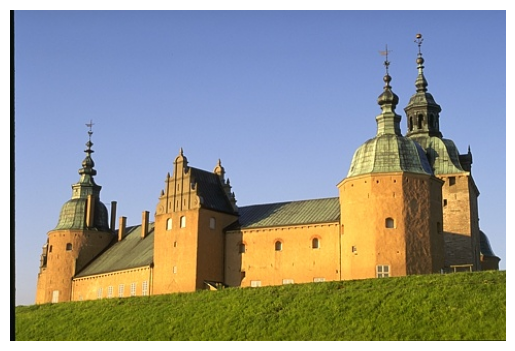

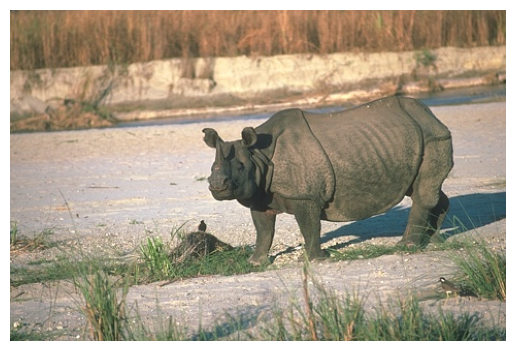

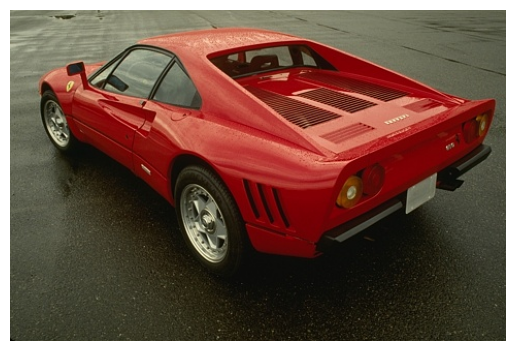

Reshaped Image Data Shape: (154401, 3)
Reshaped Image Data Shape: (154401, 3)
Reshaped Image Data Shape: (154401, 3)


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define dataset paths
image_paths = {
    "train": "/content/dataset/images/train",
    "test": "/content/dataset/images/test",
    "val": "/content/dataset/images/val"
}

# Function to load and reshape images for clustering
def load_and_reshape_images(folder, num_images=3):
    images = []
    reshaped_images = []

    filenames = os.listdir(folder)[:num_images]  # Load a few images for testing
    for file in filenames:
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path)

        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            images.append(img)

            # Reshape from (H, W, 3) → (H*W, 3)
            reshaped = img.reshape((-1, 3))
            reshaped = np.float32(reshaped)  # Convert to float32 for K-Means
            reshaped_images.append(reshaped)

    return images, reshaped_images

# Load and reshape images from the test dataset
images, reshaped_images = load_and_reshape_images(image_paths["test"])

# Display original images
for img in images:
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Print reshaped data shape (should be (H*W, 3))
for reshaped in reshaped_images:
    print(f"Reshaped Image Data Shape: {reshaped.shape}")


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define dataset paths
image_paths = {
    "train": "/content/dataset/images/train",
    "test": "/content/dataset/images/test",
    "val": "/content/dataset/images/val"
}

# Function to load and reshape images for clustering
def load_and_reshape_images(folder, num_images=3):
    images, reshaped_images = [], []
    filenames = os.listdir(folder)[:num_images]  # Load a few images for testing

    for file in filenames:
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path)

        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            images.append(img)

            # Reshape from (H, W, 3) → (H*W, 3)
            reshaped = img.reshape((-1, 3))
            reshaped = np.float32(reshaped)  # Convert to float32 for K-Means
            reshaped_images.append(reshaped)

    return images, reshaped_images

# Function to determine the best K using the Elbow Method
def find_optimal_k(image_pixels, max_k=10):
    distortions = []
    silhouette_scores = []

    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(image_pixels)

        # Compute inertia (distortion)
        distortions.append(kmeans.inertia_)

        # Compute silhouette score (higher is better)
        silhouette = silhouette_score(image_pixels, labels)
        silhouette_scores.append(silhouette)

    # Plot Elbow Method
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_k + 1), distortions, marker='o')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Distortion (Inertia)")
    plt.title("Elbow Method for Optimal K")

    # Plot Silhouette Score
    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', color='red')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score Analysis")

    plt.show()

# Function to apply K-Means clustering and reconstruct the image
def apply_kmeans(image, k):
    h, w, c = image.shape
    pixels = image.reshape((-1, 3))
    pixels = np.float32(pixels)

    # Apply K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pixels)
    centers = kmeans.cluster_centers_

    # Reconstruct the image
    clustered_image = centers[labels].reshape((h, w, c))
    clustered_image = np.uint8(clustered_image)  # Convert back to uint8

    return clustered_image

# Load and reshape images from the test dataset
images, reshaped_images = load_and_reshape_images(image_paths["test"], num_images=1)

# Determine the optimal K using the first image
find_optimal_k(reshaped_images[0])

# Manually choose K based on the elbow method and silhouette score
optimal_k = 6  # Adjust based on the graph results

# Apply K-Means clustering with optimal K
segmented_images = [apply_kmeans(img, optimal_k) for img in images]

# Display original and segmented images
for i in range(len(images)):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(images[i])
    axs[0].set_title("Original Image")
    axs[0].axis("off")

    axs[1].imshow(segmented_images[i])
    axs[1].set_title(f"Segmented Image (K={optimal_k})")
    axs[1].axis("off")

    plt.show()


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define dataset paths
image_paths = {
    "train": "/content/dataset/images/train",
    "test": "/content/dataset/images/test",
    "val": "/content/dataset/images/val"
}

# Function to load an image
def load_image(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    return img

# Function to reshape image data for clustering
def reshape_image(image):
    h, w, c = image.shape
    pixels = image.reshape((-1, 3))  # Reshape to (H*W, 3)
    pixels = np.float32(pixels)  # Convert to float32 for K-Means
    return pixels, (h, w, c)

# Function to apply K-Means clustering and reconstruct image
def apply_kmeans(image, k):
    pixels, shape = reshape_image(image)

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pixels)
    centers = kmeans.cluster_centers_

    # Reconstruct the image using clustered labels
    clustered_image = centers[labels].reshape(shape)
    clustered_image = np.uint8(clustered_image)  # Convert back to uint8

    return clustered_image

# Select a test image
test_image_path = os.path.join(image_paths["test"], os.listdir(image_paths["test"])[0])
test_image = load_image(test_image_path)

# Apply K-Means with selected K value
k = 6  # Adjust based on previous Elbow/Silhouette analysis
segmented_image = apply_kmeans(test_image, k)

# Display original vs. segmented image
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(test_image)
axs[0].set_title("Original Image")
axs[0].axis("off")

axs[1].imshow(segmented_image)
axs[1].set_title(f"Segmented Image (K={k})")
axs[1].axis("off")

plt.show()


🔹 Comparing Segmentation Results for Different K Values
To compare segmentation results for different values of K, we need to:

Generate segmented images for multiple values of K (e.g., K=3, K=6, K=10).

Compare segmentation accuracy using a metric like Boundary Displacement Error (BDE).

Plot results to visualize differences.

✅ What is Boundary Displacement Error (BDE)?
BDE measures how much the segmented image boundaries deviate from the ground truth boundaries.
A lower BDE means the segmentation is more accurate. **bold text**

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.segmentation import find_boundaries
from scipy.spatial.distance import cdist

# Dataset paths
image_paths = {
    "test": "/content/dataset/images/test",
    "ground_truth": "/content/dataset/ground_truth/test"
}

# Load an image and ground truth boundary
def load_image(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    return img

# Function to reshape image data for clustering
def reshape_image(image):
    h, w, c = image.shape
    pixels = image.reshape((-1, 3))  # Reshape to (H*W, 3)
    pixels = np.float32(pixels)  # Convert to float32 for K-Means
    return pixels, (h, w, c)

# Function to apply K-Means clustering
def apply_kmeans(image, k):
    pixels, shape = reshape_image(image)

    # Apply K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pixels)
    centers = kmeans.cluster_centers_

    # Reconstruct the image
    clustered_image = centers[labels].reshape(shape)
    clustered_image = np.uint8(clustered_image)  # Convert back to uint8

    return clustered_image, labels.reshape(shape[:2])  # Return image & label map

# Function to compute Boundary Displacement Error (BDE)
def compute_bde(segmented_labels, ground_truth):
    seg_boundaries = find_boundaries(segmented_labels, mode='thick')
    gt_boundaries = find_boundaries(ground_truth, mode='thick')

    seg_coords = np.argwhere(seg_boundaries)
    gt_coords = np.argwhere(gt_boundaries)

    if len(seg_coords) == 0 or len(gt_coords) == 0:
        return float("inf")  # If no boundaries found, return high error

    # Compute distance from each segmented boundary to the closest GT boundary
    distances = cdist(seg_coords, gt_coords)
    min_distances = np.min(distances, axis=1)

    # Compute average displacement
    bde = np.mean(min_distances)
    return bde

# Select a test image and corresponding ground truth
test_image_name = os.listdir(image_paths["test"])[0]
test_image_path = os.path.join(image_paths["test"], test_image_name)
ground_truth_path = os.path.join(image_paths["ground_truth"], test_image_name)

test_image = load_image(test_image_path)
ground_truth = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Compare different K values
k_values = [3, 6, 10]
bde_scores = []

fig, axs = plt.subplots(1, len(k_values) + 1, figsize=(15, 5))

# Show original image
axs[0].imshow(test_image)
axs[0].set_title("Original Image")
axs[0].axis("off")

for i, k in enumerate(k_values):
    segmented_image, segmented_labels = apply_kmeans(test_image, k)
    bde = compute_bde(segmented_labels, ground_truth)
    bde_scores.append(bde)

    axs[i + 1].imshow(segmented_image)
    axs[i + 1].set_title(f"Segmented (K={k})\nBDE: {bde:.2f}")
    axs[i + 1].axis("off")

plt.show()

# Print BDE scores for comparison
for k, bde in zip(k_values, bde_scores):
    print(f"K={k}: Boundary Displacement Error = {bde:.2f}")


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.metrics import adapted_rand_error

# Define dataset paths
image_paths = {
    "train": "/content/dataset/images/train",
    "test": "/content/dataset/images/test",
    "val": "/content/dataset/images/val"
}

ground_truth_paths = {
    "train": "/content/dataset/ground_truth/train",
    "test": "/content/dataset/ground_truth/test",
    "val": "/content/dataset/ground_truth/val"
}

# Function to load and reshape images for clustering
def load_and_reshape_images(folder, num_images=3):
    images, reshaped_images = [], []
    filenames = os.listdir(folder)[:num_images]  # Load a few images for testing

    for file in filenames:
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path)

        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            images.append(img)

            # Reshape from (H, W, 3) → (H*W, 3)
            reshaped = img.reshape((-1, 3))
            reshaped = np.float32(reshaped)  # Convert to float32 for K-Means
            reshaped_images.append(reshaped)

    return images, reshaped_images

# Function to load ground truth images
def load_ground_truth_images(folder, num_images=3):
    masks = []
    filenames = os.listdir(folder)[:num_images]  # Load a few ground truth masks

    for file in filenames:
        mask_path = os.path.join(folder, file)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

        if mask is not None:
            masks.append(mask)

    return masks

# Function to apply K-Means clustering and reconstruct image
def apply_kmeans(image, k):
    h, w, c = image.shape
    pixels = image.reshape((-1, 3))
    pixels = np.float32(pixels)

    # Apply K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pixels)
    centers = kmeans.cluster_centers_

    # Reconstruct the image using clustered labels
    clustered_image = centers[labels].reshape((h, w, c))
    clustered_image = np.uint8(clustered_image)  # Convert back to uint8

    return clustered_image, labels.reshape((h, w))

# Function to compute Boundary Displacement Error (BDE)
def calculate_bde(ground_truth, clustered_labels):
    error, *_ = adapted_rand_error(ground_truth, clustered_labels)
    return error

# Function to compare segmentation results for different K values
def compare_segmentations(images, masks, k_values):
    bde_scores = {}

    for k in k_values:
        print(f"\nEvaluating segmentation with K={k}")
        bde_scores[k] = []

        for img, gt_mask in zip(images, masks):
            # Apply K-Means and reconstruct image
            clustered_image, clustered_labels = apply_kmeans(img, k)

            # Calculate BDE
            bde = calculate_bde(gt_mask, clustered_labels)
            bde_scores[k].append(bde)

            # Display comparison
            fig, axs = plt.subplots(1, 3, figsize=(15, 5))
            axs[0].imshow(img)
            axs[0].set_title("Original Image")
            axs[0].axis("off")
            axs[1].imshow(gt_mask, cmap="gray")
            axs[1].set_title("Ground Truth")
            axs[1].axis("off")
            axs[2].imshow(clustered_image)
            axs[2].set_title(f"Segmented (K={k})")
            axs[2].axis("off")
            plt.show()

        # Calculate and print the average BDE for this K
        avg_bde = np.mean(bde_scores[k])
        print(f"Average BDE for K={k}: {avg_bde:.4f}")

    # Plot BDE scores for all K values
    plt.figure(figsize=(10, 5))
    plt.plot(list(bde_scores.keys()), [np.mean(bde_scores[k]) for k in bde_scores.keys()], marker='o')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Average BDE")
    plt.title("Boundary Displacement Error for Different K Values")
    plt.show()

# Load images and ground truth masks from the test dataset
images, reshaped_images = load_and_reshape_images(image_paths["test"], num_images=3)
ground_truth_masks = load_ground_truth_images(ground_truth_paths["test"], num_images=3)

# Define K values to test
k_values = [2, 4, 6, 8, 10]

# Compare segmentation results using BDE for different K values
compare_segmentations(images, ground_truth_masks, k_values)


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Dataset paths (Only images)
image_paths = {
    "train": "/content/dataset/images/train",
    "test": "/content/dataset/images/test",
    "val": "/content/dataset/images/val"
}

# Function to load images
def load_images(folder, num_images=3):
    images, filenames = [], os.listdir(folder)[:num_images]  # Load a few images
    for file in filenames:
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            images.append(img)
    return images

# Function to apply K-Means and reconstruct segmented image
def apply_kmeans(image, k):
    h, w, c = image.shape
    pixels = image.reshape((-1, 3)).astype(np.float32)

    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pixels)
    centers = kmeans.cluster_centers_

    clustered_image = centers[labels].reshape((h, w, c)).astype(np.uint8)
    return clustered_image

# Function to compare segmentation results for different K values
def compare_segmentations(dataset="test", k_values=[2, 4, 6, 8, 10], num_images=3):
    images = load_images(image_paths[dataset], num_images)

    for k in k_values:
        print(f"\nEvaluating segmentation with K={k}")

        for img in images:
            clustered_image = apply_kmeans(img, k)

            fig, axs = plt.subplots(1, 2, figsize=(10, 5))
            axs[0].imshow(img)
            axs[0].set_title("Original Image")
            axs[0].axis("off")

            axs[1].imshow(clustered_image)
            axs[1].set_title(f"Segmented (K={k})")
            axs[1].axis("off")

            plt.show()

# Run comparison on test dataset
compare_segmentations(dataset="test", k_values=[2, 4, 6, 8, 10], num_images=3)
